In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style = "white")

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# nltk
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punct')
nltk.download('brown')

# dir paths
DATA_DIR = '../data'
IMG_DIR = '../img'

[nltk_data] Downloading package stopwords to /home/milos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index
[nltk_data] Downloading package brown to /home/milos/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
df = pd.read_json(f'{DATA_DIR}/fine_filtered2020_attrs.json.bz2', compression='bz2')

In [22]:
df.describe()

,numOccurrences
count,4272.000000
mean,2.294007
std,7.499984
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,266.000000


# Quote length histogram

Caclulcate size of each quote and show their length distribution in form of a log-lin histogram.

In [3]:
def count_words(sentence):
    # maybe use advanced features from NLTK
    return len(sentence.split())

In [4]:
sentence_lengths = df.apply(lambda row: count_words(row.quotation), axis=1).rename('length').reset_index()
sentence_lengths

,index,length
0,0,27
1,1,62
2,2,47
3,3,23
4,4,30
...,...,...
4267,4267,25
4268,4268,55
4269,4269,35
4270,4270,53


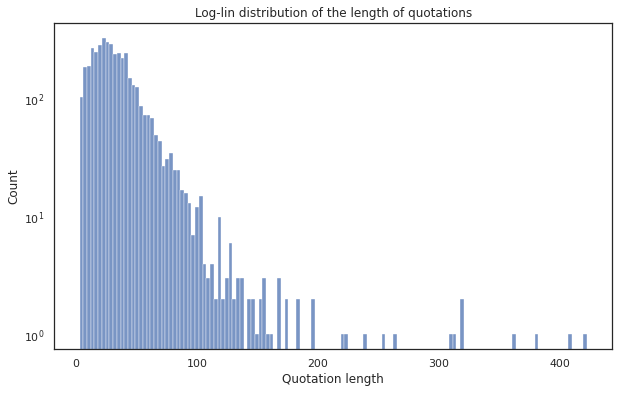

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=sentence_lengths, x='length', ax=ax)

ax.set_yscale('log')
ax.set(title='Log-lin distribution of the length of quotations', xlabel='Quotation length')

plt.show()

# Wordcloud

In this section we are going to create wordcloud based on frequency of each word in quotations.

In [6]:
from collections import Counter
from functools import reduce

from textblob import TextBlob

# Old way
# def get_word_frequencies(sentence, stop_wrods):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
#     return Counter(tokens)

# New way
def get_word_frequencies(sentence):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
    return Counter(TextBlob(sentence).noun_phrases)


First we calculate frequency of each word:

In [7]:
word_frequencies = Counter()
for sentence_freq in map(get_word_frequencies, list(df['quotation'])):
    word_frequencies.update(sentence_freq)

In the next step we create a wordcloud based on the calculated word frequencies. The word cloud contains top 200 most frequent words (stopwords excluded).

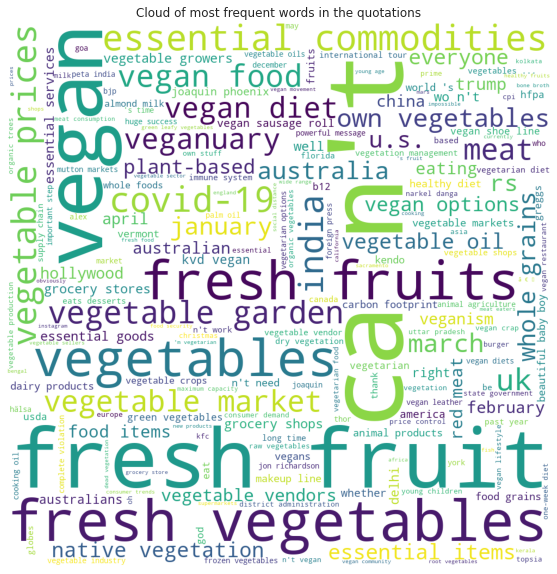

In [8]:
from wordcloud import WordCloud
from PIL import Image

USE_MASK = False # by setting to True, it will use cow mask to display wordcloud
WC_BACKGROUND = 'white'
MAX_WORDS = 200
WC_WIDTH, WC_HEIGHT = 1000, 1000
STOPWORDS = stopwords.words('english')

if USE_MASK:
    # Source: https://www.flaticon.com/free-icon/cow-silhouette_62470
    image_mask = 255 - np.array(Image.open(f'{IMG_DIR}/cow_mask.png'))
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS, 
        mask=image_mask, 
        contour_width=1, 
        contour_color='green')
else:
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS)

# Calculate wordcloud
wc = word_cloud.generate_from_frequencies(word_frequencies)

# Plot wordcloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc)
ax.axis('off')
ax.set(title='Cloud of most frequent words in the quotations')
plt.show()

# Other

In [9]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.strftime('%b %Y'))
df.index = pd.to_datetime(df['date'])
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
date,,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],Feb 2020,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,[parade.com]
2020-02-01,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],Feb 2020,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,[perishablenews.com]
2020-01-01,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],Jan 2020,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,[male],[India],[+1959-10-10T00:00:00Z],None,[politician],[Aam Aadmi Party],None,[freshplaza.com]
2020-02-01,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],Feb 2020,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,[belfastlive.co.uk]
2020-01-01,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],Jan 2020,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,"[msn.com, msn.com]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],Feb 2020,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]"
2020-01-01,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",Jan 2020,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com]
2020-03-01,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],Mar 2020,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]"


[Text(0.5, 1.0, 'Number of quotations per month'), Text(0.5, 0, 'Month')]

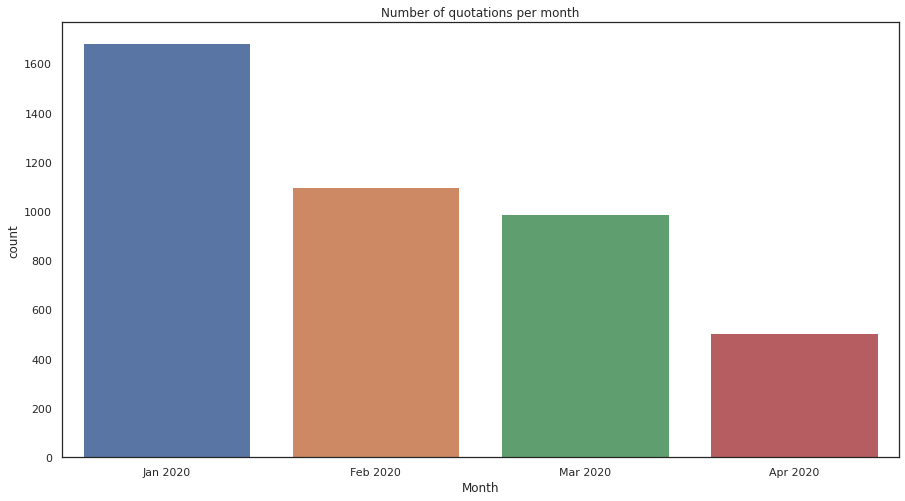

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='date', ax=ax, order=['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020'])

ax.set(title='Number of quotations per month', xlabel='Month')
# sns.despine(bottom = True, left = True)

# Sentiment analysis

In this section we perform sentiment analysis using a sentiment intensity analyzer called Vader which is provided in package NLTK.

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/milos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Example of usage: it provides a dictionary with 4 values,
#     negative, positive and neutral score, as well as a single value compound
#     that can be interpreted roughly such that if it's > 0 the input has positive overall
#     sentiment, if it's < 0 the sentiment is negative and == 0 it's neutral. Higher thresholds
#     than 0 can be set for neutral sentiment
sentiment_analyzer.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [28]:
def get_sentiment(analyzer, sentence):
    THRESHOLD = 5e-2
    compound = analyzer.polarity_scores(sentence)['compound']
    if compound > THRESHOLD:
        return 'positive'
    elif compound < -THRESHOLD:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment'] = df.apply(lambda row: get_sentiment(sentiment_analyzer, row.quotation), axis=1)

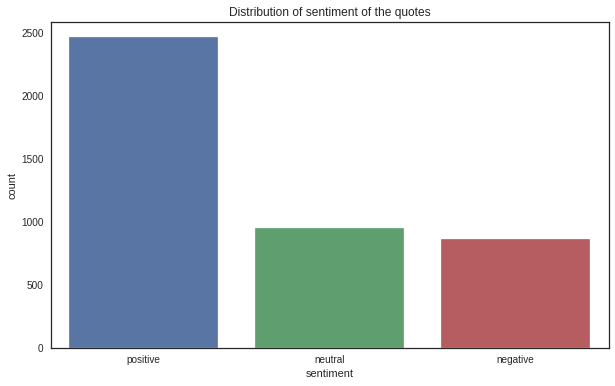

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=sentiment_of_quotes, x='sentiment', ax=ax)

ax.set(title='Distribution of sentiment of the quotes')

plt.show()

In [82]:
time_distribution = pd.pivot_table(
    df.sort_values('date'),
    columns=['sentiment'],
    index=['date'],
    aggfunc=len
)['numOccurrences'].fillna(0) # numOccurrences irrelevant in the context, any column other than date would suffice

time_distribution

sentiment,negative,neutral,positive
date,,,
2020-01-01 00:00:00,0.0,0.0,1.0
2020-01-01 01:00:00,0.0,1.0,2.0
2020-01-01 01:11:00,0.0,0.0,1.0
2020-01-01 01:15:00,0.0,0.0,1.0
2020-01-01 05:00:00,0.0,0.0,1.0
...,...,...,...
2020-04-16 18:12:00,0.0,0.0,1.0
2020-04-16 19:27:40,1.0,0.0,0.0
2020-04-16 19:27:49,0.0,2.0,1.0


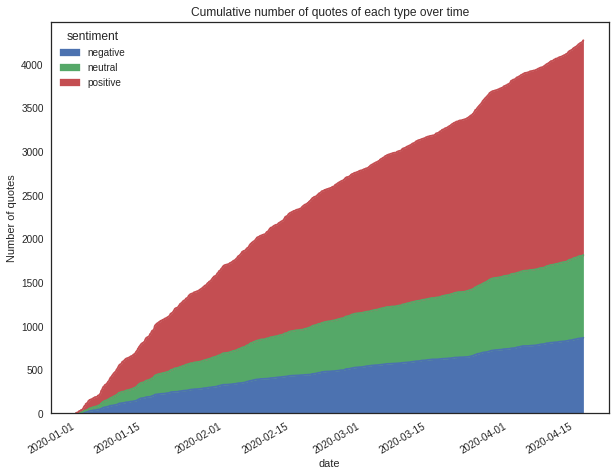

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.style.use('seaborn-white')

ax.set(title='Cumulative number of quotes of each type over time', xlabel='Date', ylabel='Number of quotes')
time_distribution.cumsum().plot.area(ax=ax)
plt.show()

In [43]:
df.sort_values('date')

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment
3215,2020-01-01-027042,Rather than resolving to lose 20 pounds this y...,None,[],2020-01-01 00:00:00,2,"[[None, 0.8003], [Peter Reinhart, 0.1997]]",[http://www.wfae.org/post/experts-guide-new-ye...,E,None,None,None,None,None,None,None,None,"[wfae.org, wfae.org]",positive
3069,2020-01-01-044560,"Within the weight management program, we set g...",Jeb Bush,[Q221997],2020-01-01 01:00:00,1,"[[Jeb Bush, 0.6211], [None, 0.3789]]",[https://www.connectsavannah.com/savannah/fors...,E,Q221997,[male],"[United States of America, Spain]",[+1953-02-11T00:00:00Z],None,"[banker, politician, real estate developer, bo...",[Republican Party],[Bachelor of Arts],[connectsavannah.com],neutral
4215,2020-01-01-028611,So this program will alleviate those barriers ...,None,[],2020-01-01 01:00:00,1,"[[None, 0.7387], [Jeb Bush, 0.2613]]",[https://www.connectsavannah.com/savannah/fors...,E,None,None,None,None,None,None,None,None,[connectsavannah.com],positive
3003,2020-01-01-017747,Instead of doctors writing prescriptions for m...,Jeb Bush,[Q221997],2020-01-01 01:00:00,1,"[[Jeb Bush, 0.8418], [None, 0.1582]]",[https://www.connectsavannah.com/savannah/fors...,E,Q221997,[male],"[United States of America, Spain]",[+1953-02-11T00:00:00Z],None,"[banker, politician, real estate developer, bo...",[Republican Party],[Bachelor of Arts],[connectsavannah.com],positive
4194,2020-01-01-035659,They warned to expect an extended and protract...,David Littleproud,[Q25756209],2020-01-01 01:11:00,3,"[[David Littleproud, 0.5869], [None, 0.4131]]",[http://www.canberratimes.com.au/story/6562761...,E,Q25756209,[male],[Australia],[+1976-09-04T00:00:00Z],None,[politician],[Liberal National Party of Queensland],None,"[canberratimes.com.au, canberratimes.com.au, c...",positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,2020-04-16-037141,Our real concern remains around vegetables and...,Mike Chapman,"[Q254385, Q54807424]",2020-04-16 19:27:49,3,"[[Mike Chapman, 0.8845], [None, 0.1155]]","[http://home.nzcity.co.nz/nl.aspx?4471152, htt...",E,None,None,None,None,None,None,None,None,"[nzcity.co.nz, radionz.co.nz, nzherald.co.nz]",neutral
1646,2020-04-16-013217,"Going to level 3, with Click and Collect (onli...",Mike Chapman,"[Q254385, Q54807424]",2020-04-16 19:27:49,3,"[[Mike Chapman, 0.7806], [None, 0.2194]]","[http://home.nzcity.co.nz/nl.aspx?4471152, htt...",E,None,None,None,None,None,None,None,None,"[nzcity.co.nz, radionz.co.nz, nzherald.co.nz]",positive
2252,2020-04-16-064436,We're seeing a lot of people who aren't gettin...,Mike Chapman,"[Q254385, Q54807424]",2020-04-16 19:27:49,3,"[[Mike Chapman, 0.7533], [None, 0.2467]]","[http://home.nzcity.co.nz/nl.aspx?4471152, htt...",E,None,None,None,None,None,None,None,None,"[nzcity.co.nz, radionz.co.nz, nzherald.co.nz]",neutral
173,2020-04-16-035322,Now we're faced with the prospect of needing m...,Tom Bradshaw,[Q3990585],2020-04-16 19:39:00,2,"[[Tom Bradshaw, 0.9831], [None, 0.0169]]",[http://www.minsterfm.com/news/national/308433...,E,Q3990585,[male],[United Kingdom],[+1992-07-27T00:00:00Z],None,[association football player],None,None,"[minsterfm.com, mix96.co.uk]",negative


In [30]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment
0,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,[parade.com],positive
1,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,[perishablenews.com],positive
2,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,[male],[India],[+1959-10-10T00:00:00Z],None,[politician],[Aam Aadmi Party],None,[freshplaza.com],neutral
3,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,[belfastlive.co.uk],neutral
4,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,"[msn.com, msn.com]",neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]",positive
4268,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com],positive
4269,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]",positive
4270,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,[male],[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com],negative
